#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

# Task 2


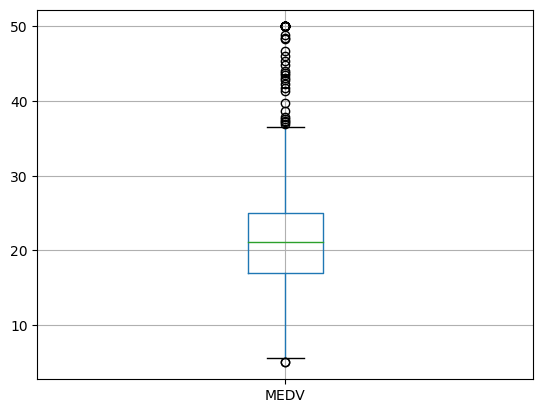

In [5]:
boston_df.boxplot("MEDV")
pyplot.show()

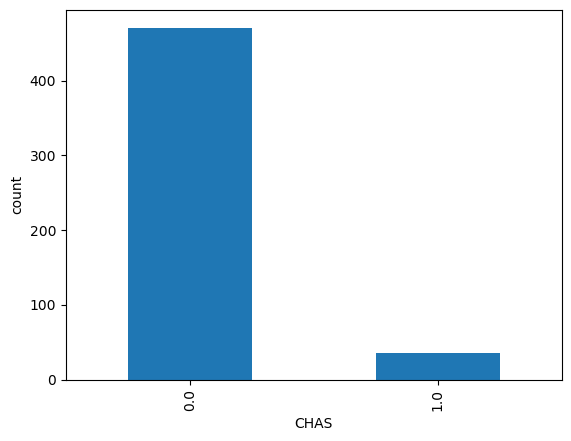

In [6]:
boston_df.CHAS.value_counts().plot.bar(xlabel="CHAS", ylabel="count")
pyplot.show()

In [7]:
boston_df["AGE_GROUP"] = pd.cut(boston_df.AGE, bins=[0, 35, 75, boston_df.AGE.max()],)

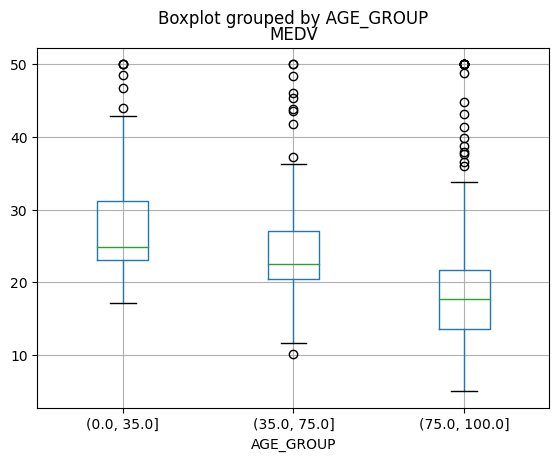

In [8]:
boston_df.boxplot("MEDV", "AGE_GROUP")
pyplot.show()

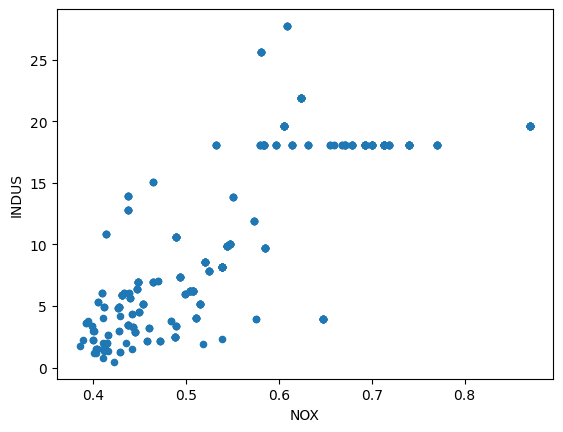

In [9]:
boston_df.plot.scatter("NOX", "INDUS")
pyplot.show()

There is a posistive relationship between nitrous oxides and the proportion of non-retail businesses in an area

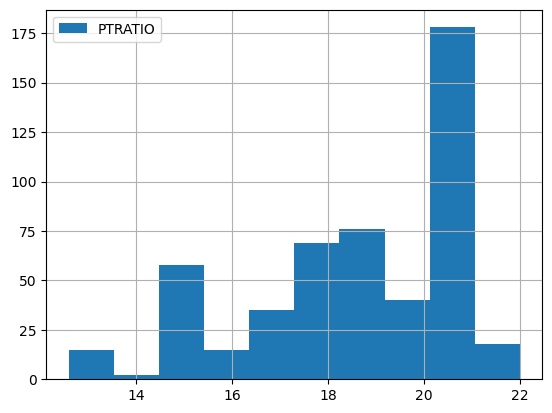

In [10]:
boston_df.PTRATIO.hist(legend=True)
pyplot.show()

# Task 3

#### Hypothesis: there is no significant difference in median value of houses bounded by the Charles river

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 0].MEDV, boston_df[boston_df.CHAS == 1].MEDV)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conculsion: We reject the null hypothesis that the houses bounded by the river have same median value

#### Hypothesis: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [12]:
scipy.stats.f_oneway(
    boston_df[boston_df.AGE.between(0.0, 34.0)].MEDV,
    boston_df[boston_df.AGE.between(35.0, 75.0)].MEDV,
    boston_df[boston_df.AGE.between(76.0, 100.0)].MEDV
)

F_onewayResult(statistic=38.35672291814738, pvalue=3.211576220615288e-16)

Conculsion: We reject the null hypothesis that the owner age has no effect on the median value of the houses.

#### Hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [13]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

There is a strong positive correlation between the NOX concentrations and the proportion of non-retail busnesses.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
model = ols(formula='MEDV ~ DIS', data=boston_df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.21e-08
Time:                        14:11:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a significant impact of the distance on the value. On average, the value increases by 1.1 for each additional unit of distance.